## Data Set : NationalNames.csv 
download : https://drive.google.com/file/d/0B9fcvsgEhJNsN0FUaGZudFYyTVU/view

-  Id: 행 구분자 

-  Name: 유아 이름

-  Year: 출생연도

-  Gender: 성별

-  Count: 해당 (이름, 연도, 성별)의 출생횟수

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 문제 1) NationalNames.csv 파일을 읽어오고, 컬럼을 'id', 'name', 'year', 'sex', 'births' 로 바꾸기 (5점)
- dataframe으로 읽어올 것
- 'names' 변수에 저장할 것

In [2]:
names = pd.read_csv('data/us-baby-names/NationalNames.csv', sep=','
                   ,header=0, names = ['id','name','year','sex','births'])
names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


### 문제 2) 2012년 이후에 태어난  'Emma' 이름을 가진 남자 아이에 대한 총 출생횟수 구하기 (10점) 

In [24]:
a = names.loc[(names['year'] >= 2012) & (names['name'] == 'Emma') & (names['sex'] == 'M'), :]
#a.head(20)
total_births_Emma = a['births'].sum()

print('>> 2012년 이후 남자 Emma이름의 총 출생횟수 : {}명'.format(total_births_Emma))

>> 2012년 이후 남자 Emma이름의 총 출생횟수 : 50명


### 문제 3) 각 연도별 남아와 여아의 총 출생횟수를 산출하고, 라인 플롯으로 나타내기 (20점)
- index : 연도
- 출력 컬럼 : 여아, 남아
- value :각 연도별 여아 총 출생횟수, 남아 총 출생횟수
- 라인플롯의 제목 : 'The graph showing changes for births per year' 

In [7]:
total_births = names.pivot_table('births', index='year', columns='sex', 
                                 aggfunc = 'sum')
total_births.head(10)

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853


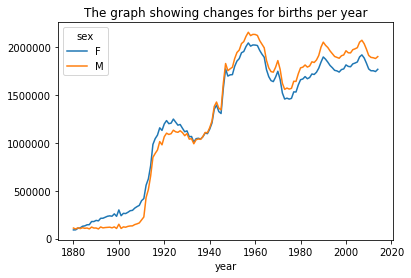

In [8]:
ax = total_births.plot(title='The graph showing changes for births per year')

### 문제 4) 각 연도, 성별 그룹 내에서 각 이름의 출생횟수가 각 그룹에서 차지하는 비중(%)을 나타내는 열 추가하기 (20점) 
 - 추가 열이름 : 'pct'로 생성 
 - 'pct'열에 각 연도, 성별 그룹내의 각 이름에 대한 출생횟수 비중을 계산하여 추가

In [5]:
grouped_names_dict = dict(list(names.groupby(['year','sex'])))
grouped_names_dict.keys()

dict_keys([(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M'), (1885, 'F'), (1885, 'M'), (1886, 'F'), (1886, 'M'), (1887, 'F'), (1887, 'M'), (1888, 'F'), (1888, 'M'), (1889, 'F'), (1889, 'M'), (1890, 'F'), (1890, 'M'), (1891, 'F'), (1891, 'M'), (1892, 'F'), (1892, 'M'), (1893, 'F'), (1893, 'M'), (1894, 'F'), (1894, 'M'), (1895, 'F'), (1895, 'M'), (1896, 'F'), (1896, 'M'), (1897, 'F'), (1897, 'M'), (1898, 'F'), (1898, 'M'), (1899, 'F'), (1899, 'M'), (1900, 'F'), (1900, 'M'), (1901, 'F'), (1901, 'M'), (1902, 'F'), (1902, 'M'), (1903, 'F'), (1903, 'M'), (1904, 'F'), (1904, 'M'), (1905, 'F'), (1905, 'M'), (1906, 'F'), (1906, 'M'), (1907, 'F'), (1907, 'M'), (1908, 'F'), (1908, 'M'), (1909, 'F'), (1909, 'M'), (1910, 'F'), (1910, 'M'), (1911, 'F'), (1911, 'M'), (1912, 'F'), (1912, 'M'), (1913, 'F'), (1913, 'M'), (1914, 'F'), (1914, 'M'), (1915, 'F'), (1915, 'M'), (1916, 'F'), (1916, 'M'), (1917, 'F'), (1917, 'M'), (

In [6]:
def add_prop(agg_df):   #add_df : 위와 같이 그룹화된 데이터들이  인자로 들어간다.
    add_births = agg_df["births"]
    agg_df["prop"] = (add_births / add_births.sum()) *100
    
    return agg_df

In [7]:
# 각 연도별 남자그룹에서의 비율, 여자그룹에서의 비율이 구해짐
names_with_prop = names.groupby(["year", "sex"]).apply(add_prop)
names_with_prop.head(2000)#.sort_values(by='prop', ascending=False)

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,7.764334
1,2,Anna,1880,F,2604,2.861759
2,3,Emma,1880,F,2003,2.201268
3,4,Elizabeth,1880,F,1939,2.130933
4,5,Minnie,1880,F,1746,1.918829
5,6,Margaret,1880,F,1578,1.734199
6,7,Ida,1880,F,1472,1.617707
7,8,Alice,1880,F,1414,1.553966
8,9,Bertha,1880,F,1320,1.450661
9,10,Sarah,1880,F,1288,1.415493


## 5. 각 연도별, 성별에 따른 출생 빈도수가 가장 높은 이름 100개 추출하기 (15점)

In [8]:
grouped = names.groupby(['year', 'sex'])
grouped.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
942,943,John,1880,M,9655
943,944,William,1880,M,9532
944,945,James,1880,M,5927
945,946,Charles,1880,M,5348
946,947,George,1880,M,5126


In [9]:
result = []

for year, group in names.groupby(['year', 'sex']):
    result.append(group.sort_index(by='births', ascending=False)[:100])

top100 = pd.concat(result, ignore_index=True)

top100[:10]
#top100.tail(10)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414
8,9,Bertha,1880,F,1320
9,10,Sarah,1880,F,1288


## 6. 남자아이 / 여자아이 이름에 대한 시대별 추이 구하기 (30점)
 -  전체연도에서 성별구분없이 가장 많이 출생한 이름 top10을 구해서 
    top10에 해당하는 이름에 대한 출생횟수 변화추이를 각각 이름별로 
    subplot 10행 1열의 라인플롯으로 나타낸다
      
 - 그래프를 기반으로 결과 도출 (2000년을 기준으로 전에는 어떤 이름들이 
   유행했고, 이후에는 어떤 이름들이 유행했는지 확인)
   
 - 하기 subplot과 같은 방식으로 그래프 생성하기 
 

In [10]:
# 상위 100개의 데이터를 남자/여자로 분리
boys = top100[top100.sex=='M']
girls = top100[top100.sex=='F']

In [11]:
boys[:5]

,id,name,year,sex,births
100,943,John,1880,M,9655
101,944,William,1880,M,9532
102,945,James,1880,M,5927
103,946,Charles,1880,M,5348
104,947,George,1880,M,5126


In [12]:
girls[:5]

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [13]:
# 탑100 자료를 성별 상관없이 좀 변경.
total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [14]:
total_births[:5]

name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adrian,Agnes,Aidan,...,Willis,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,473.0,NaN,...,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,424.0,NaN,...,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,565.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,623.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,703.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#전체에서 가장 많이 출생한 이름 top10 구하기 
result_top1 = []

for year, group in names.groupby(['year']):
    result_top1.append(group.sort_index(by='births', ascending=False)[:10])

top1 = pd.concat(result_top1, ignore_index=True)


# top10 구하기 
a = top1.sort_values(by='births', ascending=False).drop_duplicates(['name'])
a[:10]



C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


,id,name,year,sex,births
670,431053,Linda,1947,F,99680
671,437158,James,1947,M,94755
770,544603,Michael,1957,M,92709
672,437159,Robert,1947,M,91642
673,437160,John,1947,M,88318
751,521860,David,1955,M,86191
410,180216,Mary,1921,F,73985
675,437161,William,1947,M,66969
921,726661,Jennifer,1972,F,63606
855,633420,Lisa,1965,F,60268


In [23]:
aaa = names.loc[(names['name'] == 'James'), :]
aaa['births'].sum()

5129096

In [207]:
# 전체 top10 이름의 그래프 그리기
subset = total_births[['Linda', 'Michael', 'James', 'Robert','David','Mary','John','Jacob','Isabella']]
subset[:5]

name,Linda,Michael,James,Robert,David,Mary,John,Jacob,Isabella
year,,,,,,,,,
1880,NaN,354.0,5927.0,2415.0,869.0,7065.0,9655.0,404.0,NaN
1881,NaN,298.0,5442.0,2140.0,750.0,6919.0,8769.0,381.0,NaN
1882,NaN,321.0,5892.0,2500.0,838.0,8148.0,9557.0,390.0,NaN
1883,NaN,307.0,5224.0,2334.0,735.0,8012.0,8894.0,356.0,NaN
1884,NaN,373.0,5693.0,2469.0,761.0,9217.0,9388.0,381.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A201BC5BA8>,
      dtype=object)

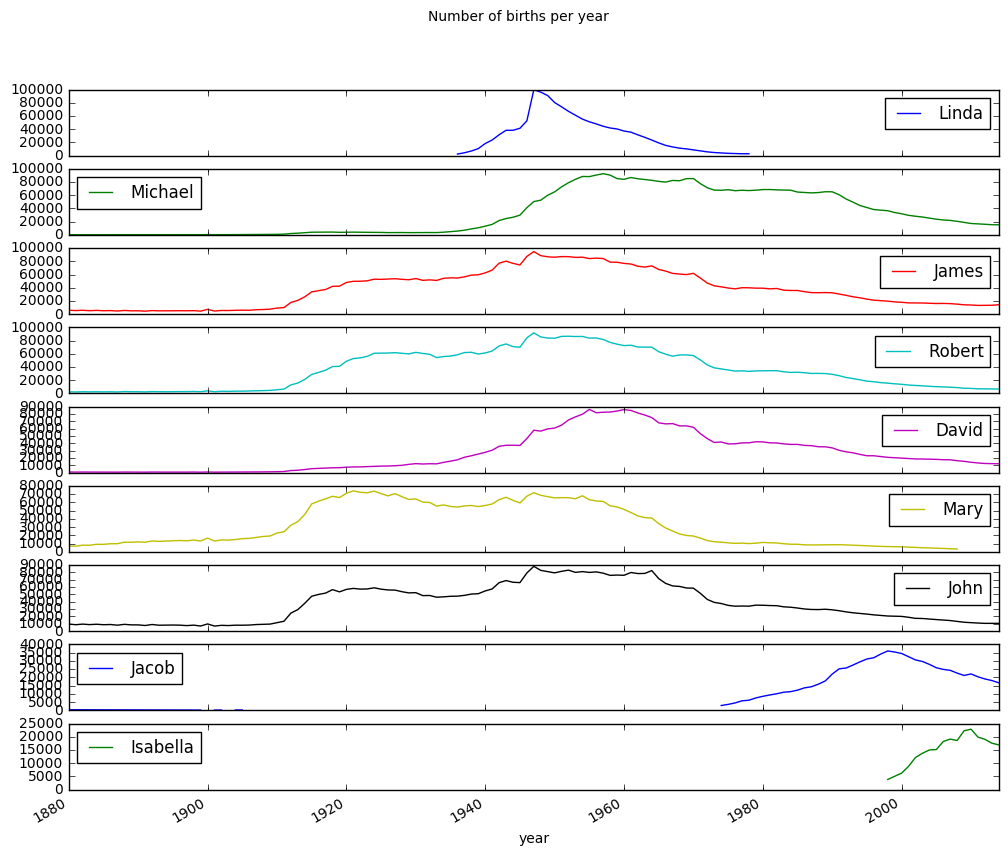

In [208]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

### >> 2000년 전에는 Linda, James, Robert....란 이름이 유행했고, 2000년 이후에는 Jacob, Isabella란 이름이 유행했군요

## 7. 친구의 친밀도 계산하기
- 친구 리스트에서 자신의 모든 친구를 찾고 친밀도를 계산
- 입력 : 친구 관계 그래프 g, 모든 친구를 찾을 자신 start
- 출력 : 모든 친구의 이름과 자신과의 친밀도

(자기 자신은 0촌, 내 친구는 1촌, 내 친구는 아니지만 내 친구의 친구는 2촌, 내 친구의 친구의 친구는 3촌....)
